In [1]:
library(seqinr)
library(MASS)

First of all, in order to produce the list of prime numbers required, we will use a function for the [Sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes).

In [2]:
sieve <- function(n) {
  n <- as.integer(n)
  if(n > 1e6) stop("n too large")
  primes <- rep(TRUE, n)
  primes[1] <- FALSE
  last.prime <- 2L
  for(i in last.prime:floor(sqrt(n)))
  {
    primes[seq.int(2L*last.prime, n, last.prime)] <- FALSE
    last.prime <- last.prime + min(which(primes[(last.prime+1):n]))
  }
  which(primes)
}

The next function reads a FASTA formated text file, either for DNA or AA sequences:

In [3]:
seqList <- function(x, type) {
  if (type == "DNA") {
    as.list(read.fasta(x,
                       as.string = FALSE,
                       seqtype="DNA",
                       seqonly = FALSE,
                       strip.desc = TRUE))
  }
  else {
    if (type == "AA") {
      as.list(read.fasta(x,
                         as.string = FALSE,
                         seqtype="AA",
                         seqonly = FALSE,
                         strip.desc = TRUE))
    }
    else {
      NULL
    }
  }
}

This function produces `count` nucleotide sequences of length `length`, with the probability of appearance for each nucleotide adhering to the parameter `prob` (default is equal distribution), and stores them in fasta format in the file `fileNameRandSeqs`.

In [4]:
createRandomSequencesBasedOnDistr <- function(count, length, prob=c(0.25,0.25,0.25,0.25), fileNameRandSeqs) {
  
  sink(fileNameRandSeqs)
  for (i in 1:count) {
    cat(">Seq", i, "\n", sep = "")
    seqX <- sample(c("A","C","G","T"), length, rep=TRUE, prob)
    cat(paste(seqX,collapse=""), "\n", sep = "")
  }
  sink()
}

This function creates a random permutation of values (1 to 4, or 1 to 23 based on the `type` value), for as many times as the number of seeds provided in the `seedList`.

In [5]:
createRandomSequenceValues <- function(seedList, type) {
  
  if ( type == "DNA" ) {
    results <- matrix(, nrow = length(seedList), ncol = 4)
  }
  else if ( type == "AA" ) {
    results <- matrix(, nrow = length(seedList), ncol = 23)
  }
  
  for (i in 1:length(seedList)) {
    if ( type == "DNA" ) {
      results[i,] <- sample(seq(from = 1, to = 4, by = 1), size = 4, replace = FALSE)
    }
    else if ( type == "AA" ) {
      results[i,] <- sample(seq(from = 1, to = 23, by = 1), size = 23, replace = FALSE)
    }
  }
  return(results)
}

The next function assigns random values to each of the letters (either the four bases in DNA or the 22+1 aminoacids). In each case, the exact random sequence is printed out, in order to retrieve the exact allocation if necessary:

In [6]:
assignSets <- function(randSequenceValues, type) {

  if (type == "DNA") {
    #DNA Set
    cat("Sequence Values: (")
    for (i in 1:4) {
      cat(paste(randSequenceValues[i], ", "))
    }
    cat(")\n")
    assign("a", randSequenceValues[1], envir = .GlobalEnv)
    assign("t", randSequenceValues[2], envir = .GlobalEnv)
    assign("g", randSequenceValues[3], envir = .GlobalEnv)
    assign("c", randSequenceValues[4], envir = .GlobalEnv)
  }
  else if ( type == "AA") {
    # AA Set 1
    cat("Sequence Values: (")
    for (i in 1:23) {
      cat(paste(randSequenceValues[i], ", "))
    }
    cat(")\n")
    assign("A", randSequenceValues[1], envir = .GlobalEnv) # alanine, ala
    assign("R", randSequenceValues[2], envir = .GlobalEnv) # arginine, arg
    assign("N", randSequenceValues[3], envir = .GlobalEnv) # asparagine, asn
    assign("D", randSequenceValues[4], envir = .GlobalEnv) # aspartic acid, asp
    assign("B", randSequenceValues[5], envir = .GlobalEnv) # sparagine or aspartic acid, asx
    assign("C", randSequenceValues[6], envir = .GlobalEnv) # cysteine, cys
    assign("E", randSequenceValues[7], envir = .GlobalEnv) # glutamic acid, glu
    assign("Q", randSequenceValues[8], envir = .GlobalEnv) # glutamine, gln
    assign("Z", randSequenceValues[9], envir = .GlobalEnv) # glutamine or glutamic acid, glx
    assign("G", randSequenceValues[10], envir = .GlobalEnv) # glycine, gly
    assign("H", randSequenceValues[11], envir = .GlobalEnv) # histidine, his
    assign("I", randSequenceValues[12], envir = .GlobalEnv) # isoleucine, ile
    assign("L", randSequenceValues[13], envir = .GlobalEnv) # leucine, leu
    assign("K", randSequenceValues[14], envir = .GlobalEnv) # lysine, lys
    assign("M", randSequenceValues[15], envir = .GlobalEnv) # methionine, met
    assign("F", randSequenceValues[16], envir = .GlobalEnv) # phenylalanine, phe
    assign("P", randSequenceValues[17], envir = .GlobalEnv) # proline, pro
    assign("S", randSequenceValues[18], envir = .GlobalEnv) # serine, ser
    assign("T", randSequenceValues[19], envir = .GlobalEnv) # threonine, thr
    assign("W", randSequenceValues[20], envir = .GlobalEnv) # tryptophan, trp
    assign("Y", randSequenceValues[21], envir = .GlobalEnv) # tyrosine, tyr
    assign("V", randSequenceValues[22], envir = .GlobalEnv) # valine, val
    assign("X", randSequenceValues[23], envir = .GlobalEnv) # undetermined
  }
}

The next function is purely for support, and prints out the statistical summaries of the input variables:

In [7]:
godelStatistics <- function(x) {
    
  if (logOutput) {
    cat(paste("  Min  : ", summary(x)[1], "\n"))
    cat(paste("1st Qu.: ", summary(x)[2], "\n"))
    cat(paste("Median : ", summary(x)[3], "\n"))
    cat(paste(" Mean  : ", summary(x)[4], "\n"))
    cat(paste("3rd Qu.: ", summary(x)[5], "\n"))
    cat(paste("  Max  : ", summary(x)[6], "\n"))
    cat(paste("St. Dev: ", sd(x), "\n"))
  }
  
  results <- list(minG = summary(x)[1], firstQG = summary(x)[2],
       medianG = summary(x)[3], meanG = summary(x)[4], 
       thirdQG = summary(x)[5], maxG = summary(x)[6],
       stdG = sd(x))
  
  return(results)
}

Starting the application, the next step is to create the list of primes as well as set the input parameters:

In [8]:
primes <- sieve(20000) # length of primes should be >= max sequence length
logOutput <- FALSE     # debug output
numberOfPoints <- 4;   # number of different assignments of letters for Godel numbers
replicate <- FALSE     # if we need to set specific seed numbers

Create a list of seeds and print out the seeds
Based on replicate value, replicate experiment by directly setting values

In [9]:
if (replicate == FALSE) {
  seedValuesList <- sample(seq(from = 1, to = 1000, by = 1), size = numberOfPoints, replace = FALSE)
  for (i in 1:numberOfPoints) {
    cat(paste(seedValuesList[i], ", "))
  }
} else {
  seedValuesList <- c(606, 62, 414)
  numberOfPoints <- length(seedValuesList)
}

99 , 751 , 633 , 96 , 

Decribe the experiment.

In [10]:
type <- "DNA"
# The following values should execute within 6 minutes with a good enough resolution
seqLengthLimit <- 361
numberOfArtificialSeqs <- 821     # "A","C","G","T"
# amend the following line for your particular distribution on nucloetide presence.
createRandomSequencesBasedOnDistr(numberOfArtificialSeqs, seqLengthLimit, c(0.25,0.25,0.25,0.25), "data/artificialSeqs.fasta")
ompGene.list <- seqList("data/artificialSeqs.fasta", type)
# ompGene.list <- seqList("data/realSeqs.fasta", type)
ompGene.list.raw <- ompGene.list

Create the matrix of rand value assignments for the particular type (AA, DNA)

In [11]:
randValues <- createRandomSequenceValues(seedValuesList, type)

randValues

2,1,3,4
2,3,4,1
3,1,2,4
4,1,2,3


However, we will also set the first association to the following:

`A: 1`, `T: 0`, `G: 0` and `C: 0`

In [12]:
# Do not run this cell if you want to check for all nucleotides and not just for A
# randValues[1,] <- c(3, 2, 1, 4)
randValues

2,1,3,4
2,3,4,1
3,1,2,4
4,1,2,3


Get a set of sequences of equal length

In [13]:
ompGene.list <- ompGene.list.raw[which(getLength(ompGene.list.raw) >= 1)]
sizeExp <- length(ompGene.list)
selectedSequences <- c(1:sizeExp)

Create the data frame that will contain godel numbers per iteration and the names

In [14]:
godelValuePoints <- data.frame(matrix(0, ncol = numberOfPoints, nrow = sizeExp))
namesList <- list()
for (i in 1:numberOfPoints) {
  namesList[i] <- paste('godel_log_pos', i, sep = '')
}
godelValuePoints <- setNames(godelValuePoints, namesList)
godelValuePoints$seqNames <- unlist(attributes(ompGene.list)$name)

We are now ready to calculate the Godel number per sequence, both using the exponential formula as well as the logarithmic formula.

For reference purposes, the formulas are as shown below:

$$g_{seq} = \prod_{k=1}^n p_k^{a_k}$$

$$G_{seq} = \sum_{k=1}^n ({a_k} logp_k)$$

where $a_k$ is the value corresponding to the base in sequence position $k$, and $p_k$ is the $k$th prime number.

We will run the process of constructed the Godel numbers for three iterations, aiming to construct coordinates for each sequence in a 3-Dimensional space (the number 3 is arbitrary and can be changed in future tests).

The code performing this calculation is the following:

In [15]:
for (indexPos in 1:numberOfPoints) {
  assignSets(randValues[indexPos,], type)
  
  godel.value.exp <- list()
  godel.value.log <- list()
  
  for (indexSeq in selectedSequences) {
    
    godel.value.exp[[indexSeq]] <- 1
    godel.value.log[[indexSeq]] <- 0
    
    if (logOutput) {
      cat("Sequence length  ")
      cat(indexSeq)
      cat("  :")
      cat(length(ompGene.list[indexSeq][[1]]))
      cat("\n")
    }

    for (i in 1:length(ompGene.list[indexSeq][[1]])) {
      
      prime <- as.numeric(primes[i])
      alpha <- as.numeric(get(as.character(ompGene.list[[indexSeq]])[i]))
      
      godel.value.exp[[indexSeq]] <- godel.value.exp[[indexSeq]] * prime ** alpha
      godel.value.log[[indexSeq]] <- godel.value.log[[indexSeq]] + alpha*log(prime)
    }
    
  }
  
  godelValuePoints[, paste('godel_log_pos', indexPos, sep = '')] <- unlist(godel.value.log)
}

Sequence Values: (2 , 1 , 3 , 4 , )
Sequence Values: (2 , 3 , 4 , 1 , )
Sequence Values: (3 , 1 , 2 , 4 , )
Sequence Values: (4 , 1 , 2 , 3 , )


It is important to note that, given the average length of the sequences involved, the sum of exponentials reaches the limit of the calculable numbers, and therefore an Infinity indication is returned. The logarithmic produces much more manageable values.

Finally, we can produce for each "coordinate" the summary of the base statistcs.

In [16]:
statsPos <- data.frame(matrix(0, ncol = 7, nrow = numberOfPoints))
statsPos <- setNames(statsPos, c("minG", "firstQG", "medianG", "meanG", "thirdQG", "maxG", "stdG"))
for (indexPos in 1:numberOfPoints) {
  statsPos[indexPos, ] <- godelStatistics(godelValuePoints[, paste('godel_log_pos', indexPos, sep = '')])
}

statsPos

minG,firstQG,medianG,meanG,thirdQG,maxG,stdG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5479.896,5862.471,5970.505,5967.165,6076.949,6390.650,148.5326
5507.690,5861.946,5961.661,5964.652,6061.664,6451.360,147.5294
5525.465,5873.785,5979.970,5969.556,6071.338,6408.127,149.0702
5475.902,5875.264,5979.420,5971.403,6069.640,6427.185,143.7330


For the first iteration, the corresponding histogram is the following:

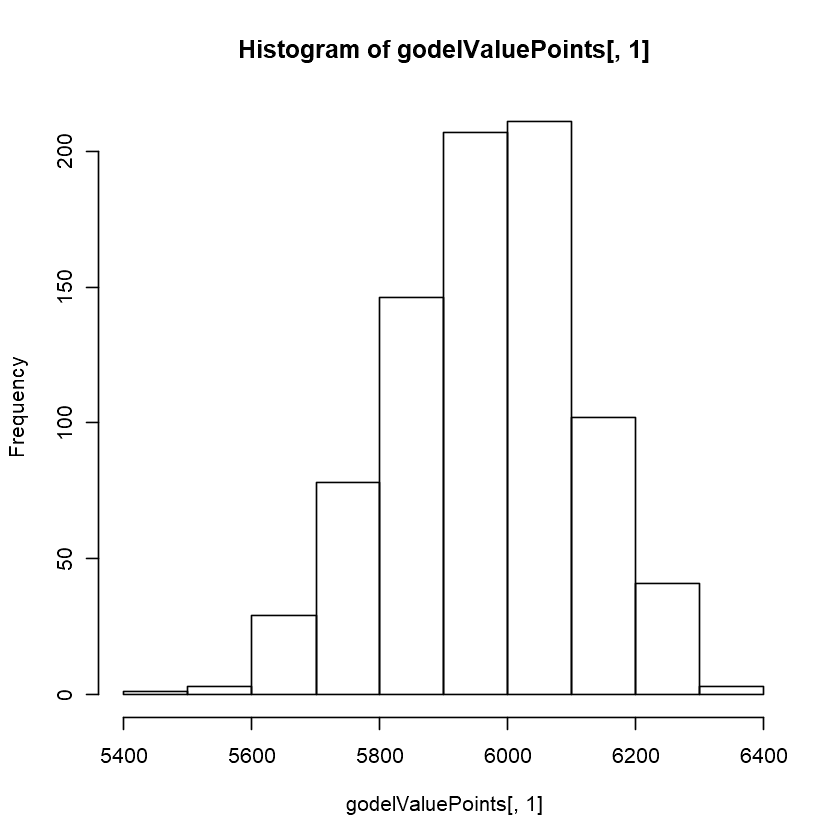

In [17]:
hist(godelValuePoints[, 1])

We can also investigate the relationship of the histogram with a normal distribution, using a fitting curve:

mean        sd 
5967.1648  148.4421

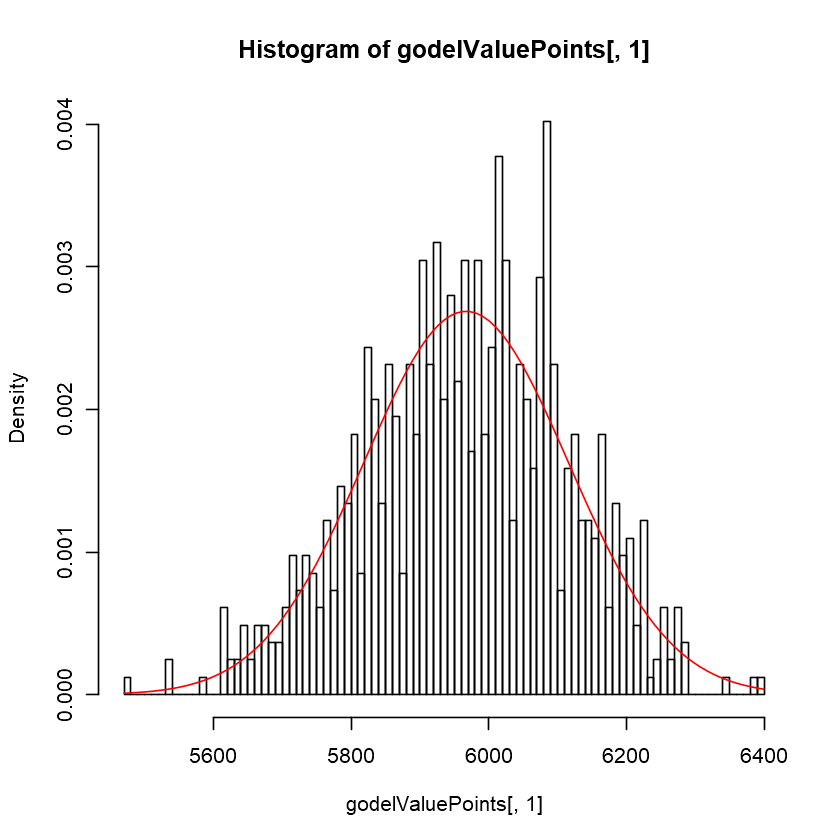

In [18]:
fit <- fitdistr(godelValuePoints[, 1], "normal")
para <- fit$estimate
hist(godelValuePoints[, 1], prob = TRUE, breaks=100)
curve(dnorm(x, para[1], para[2]), col = 2, add = TRUE)
para

Finally, we can compare the theoretical mean and std with the ones infered above. For reference, the corresponding base values are the following:


$$P_1 = \sum_{k=1}^n log(p_k)$$

$$P_2 = \sum_{k=1}^n (log(p_k))^2$$

where $p_k$ is the $k$th prime number.

We can distinguish the following two cases:

1. Each base has equal probability of appearance, equal to 0.25

$$mean_{theory-all-0.25} = P1 * 2.5$$

$$std_{theory-all-0.25} = \sqrt{P2 * 1.25}$$

2. A has a probability of 0.3 (and we ignore the probabilities of the other bases)

$$mean_{theory-A-0.3} = P1 * 0.3$$

$$std_{theory-A-0.3} = \sqrt{P2 * 0.3 * (1-0.3)}$$

In [19]:
P1 <- sum(log(primes[1:seqLengthLimit]))
P2 <- sum((log(primes[1:seqLengthLimit]))^2)

theoreticalMeanEqual <- P1*2.5
theoreticalStdEqual <- sqrt(P2*1.25)

For the first case, the theoretical values are (the experimental ones are shown below):

In [20]:
theoreticalMeanEqual
theoreticalStdEqual
para

[1] 5966.884

[1] 142.7521

mean        sd 
5967.1648  148.4421

(_the end_)